In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
ratings_df = pd.read_csv('./data/ratings_small.csv')

In [164]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [165]:
movies_df = pd.read_csv('./data/movies_metadata.csv')

In [166]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [167]:
movies_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [168]:
ratings_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [176]:
labels = (ratings_df['rating'].value_counts().sort_index())

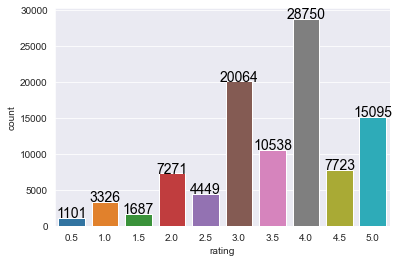

In [177]:
ax = sns.countplot(data=ratings_df, x='rating',label=labels);
for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [178]:
title_mask = movies_df['title'].isna()
movies_df = movies_df.loc[title_mask == False]

In [179]:
movies_df.id

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45460, dtype: object

In [180]:
movies_df = movies_df.astype({'id': 'int64'})

In [181]:
df = pd.merge(ratings_df, movies_df[['id', 'title']], left_on='movieId', right_on='id')
df

,userId,movieId,rating,timestamp,id,title
0,1,1371,2.5,1260759135,1371,Rocky III
1,4,1371,4.0,949810302,1371,Rocky III
2,7,1371,3.0,851869160,1371,Rocky III
3,19,1371,4.0,855193404,1371,Rocky III
4,21,1371,3.0,853852263,1371,Rocky III
...,...,...,...,...,...,...
44989,652,129009,4.0,1442690827,129009,Love Is a Ball
44990,653,2103,3.0,948161066,2103,Solaris
44991,659,167,4.0,836137550,167,K-PAX
44992,659,563,3.0,834694187,563,Starship Troopers


In [182]:
df.drop(['id', 'timestamp'], axis=1, inplace=True)

In [183]:
df

,userId,movieId,rating,title
0,1,1371,2.5,Rocky III
1,4,1371,4.0,Rocky III
2,7,1371,3.0,Rocky III
3,19,1371,4.0,Rocky III
4,21,1371,3.0,Rocky III
...,...,...,...,...
44989,652,129009,4.0,Love Is a Ball
44990,653,2103,3.0,Solaris
44991,659,167,4.0,K-PAX
44992,659,563,3.0,Starship Troopers


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44845 entries, 0 to 44993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   44845 non-null  int64  
 1   movieId  44845 non-null  int64  
 2   rating   44845 non-null  float64
 3   title    44845 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.7+ MB


In [184]:
df = df.drop_duplicates(['userId', 'title'])

In [185]:
df_pivot = df.pivot(index='userId', columns='title', values='rating').fillna(0)

In [186]:
df_pivot = df_pivot.astype('int64')

In [194]:
df_pivot.value_counts()

!Women Art Revolution  'Gator Bait  'Twas the Night Before Christmas  ...And God Created Woman  00 Schneider - Jagd auf Nihil Baxter  10 Items or Less  10 Things I Hate About You  10,000 BC  11'09''01 - September 11  12 Angry Men  13 Tzameti  1408  15 Minutes  16 Blocks  1900  1942: A Love Story  1984  2 Days in Paris  20,000 Leagues Under the Sea  2001: A Space Odyssey  2010  2046  2061 - Un anno eccezionale  21 Grams  24 Hour Party People  25th Hour  28 Days Later  28 Weeks Later  29th Street  2:37  3 Ninjas: High Noon at Mega Mountain  3-Iron  300  33 Scenes from Life  4 Months, 3 Weeks and 2 Days  40 Days and 40 Nights  42nd Street  48 Hrs.  5 Card Stud  5 Days of War  50 First Dates  54  7 Virgins  8 Mile  8 Women  88 Minutes  8:46  8½  9 Songs  95 Miles to Go  964 Pinocchio  99 francs  A Beautiful Mind  A Bridge Too Far  A Brief History of Time  A Chef in Love  A Chorus Line  A Christmas Carol  A Christmas Story  A Christmas Tale  A Clockwork Orange  A Close Shave  A Common Threa

In [30]:
def encode_ratings(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


df_pivot = df_pivot.applymap(encode_ratings)

In [31]:
df_pivot.head()

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df_pivot.to_csv('./data/movies.csv')

In [210]:
df_pivot.columns

Index(['!Women Art Revolution', ''Gator Bait',
       ''Twas the Night Before Christmas', '...And God Created Woman',
       '00 Schneider - Jagd auf Nihil Baxter', '10 Items or Less',
       '10 Things I Hate About You', '10,000 BC', '11'09''01 - September 11',
       '12 Angry Men',
       ...
       'Zodiac', 'Zombie Flesh Eaters', 'Zombie Holocaust', 'Zozo', 'eXistenZ',
       'xXx', '¡Three Amigos!', 'À nos amours', 'Ödipussi',
       'Şaban Oğlu Şaban'],
      dtype='object', name='title', length=2794)

In [33]:
len(df_pivot.loc[(df_pivot['10,000 BC'] == 1) & (df_pivot['!Women Art Revolution']) == 1])

0

1. Найти частые наборы.
    1.1 Сгенерировать всевозможные пары значений item
    1.2 Посчитать поддержку. Если набор не проходит порог минимальной поддержки, отбросить его. Найденные наборы являются "частыми".
    1.3 Сокращение наборов

In [43]:
from itertools import chain
import warnings

warnings.filterwarnings("ignore")

def combinations(iterable, r):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(pool[i] for i in indices)

def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def join_set(item_set, length):
    """Join a set with itself and returns the n-element itemsets"""
    return list(
        [i.union(j) for i in item_set for j in item_set if len(i.union(j)) == length]
    )


class Apriori:
    def __init__(self, min_support, df):
        self.df = df.head()
        self.initial_set = self._init_set(df)
        self.min_support = min_support

    def _init_set(self, df):
        t = df.columns.to_list()
        t = list(map(lambda x: {x}, t))
        return t

    def get_items_with_min_support(self, current_set):
        to_delete = []

        def check_item(item):
            t = self.df[item].sum(axis=1)
            t = t[t == len(item)]
            return t

        for item in current_set:

            t = check_item(item)
            support = len(t) / len(self.df)
            if support < self.min_support:
                to_delete.append(item)
        current_set = [x for x in current_set if x not in to_delete]
        return current_set

    def run_apriori(self):
        current_set = self.get_items_with_min_support(self.initial_set)
        large_set = {}
        k = 2
        while len(current_set) > 0:
            print(f'CURRENT SET\n{current_set}')
            large_set[k - 1] = current_set
            current_set = join_set(current_set, k)
            current_set = self.get_items_with_min_support(current_set)



In [44]:
apriori = Apriori(0.2, df_pivot)

In [36]:
apriori.run_apriori()

KeyboardInterrupt: 

In [70]:
x = df_pivot.values

In [119]:
z = np.zeros(671*2794).reshape(671,2794)
z.shape

(671, 2794)

In [126]:
y = np.arange(34453*2).reshape(34453,2)

In [127]:
y

array([[    0,     1],
       [    2,     3],
       [    4,     5],
       ...,
       [68900, 68901],
       [68902, 68903],
       [68904, 68905]])

In [128]:
print(z[:,y])

IndexError: index 2794 is out of bounds for axis 1 with size 2794

In [145]:
a = np.zeros(10).reshape(2, 5)
b = np.random.uniform(0, 4, 30).reshape(10,3).astype(int)

In [146]:
b

array([[3, 2, 0],
       [0, 1, 1],
       [3, 2, 1],
       [3, 3, 3],
       [1, 3, 1],
       [1, 3, 0],
       [3, 0, 2],
       [2, 2, 3],
       [3, 1, 1],
       [3, 3, 2]])

In [147]:
a[:,b]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [73]:
ary_col_idx = np.arange(x.shape[1])
ary_col_idx.reshape(-1,1)

array([[   0],
       [   1],
       [   2],
       ...,
       [2791],
       [2792],
       [2793]])

In [53]:
a = [1,2,3]
b = [3,4,5]

In [55]:
join_set(a,2)

AttributeError: 'int' object has no attribute 'union'

In [52]:
df_pivot[{'!Women Art Revolution'}].sum(axis=1).sum()

2

In [45]:
apriori.get_items_with_min_support(apriori.initial_set)

[{'20,000 Leagues Under the Sea'},
 {'2001: A Space Odyssey'},
 {'300'},
 {'48 Hrs.'},
 {'A Clockwork Orange'},
 {'A Nightmare on Elm Street'},
 {'A Very Long Engagement'},
 {'Aguirre: The Wrath of God'},
 {'Aliens vs Predator: Requiem'},
 {'All the Way Boys'},
 {'American Pie'},
 {'American Pie 2'},
 {'Anatomy of Hell'},
 {'Arlington Road'},
 {'As It Is in Heaven'},
 {'Ask the Dust'},
 {'Back to the Future Part II'},
 {'Bang, Boom, Bang'},
 {'Batman Begins'},
 {'Batman Returns'},
 {'Battle Royale'},
 {'Because I Said So'},
 {'Berlin: Symphony of a Great City'},
 {'Best Worst Movie'},
 {'Big Fish'},
 {'Blood Diamond'},
 {'Blood: The Last Vampire'},
 {'Boogie Nights'},
 {'Bread and Tulips'},
 {'Bridge to Terabithia'},
 {"Carla's Song"},
 {'Casablanca'},
 {'Cat on a Hot Tin Roof'},
 {'Catwoman'},
 {'Cockles and Muscles'},
 {'Cold Mountain'},
 {'Color of Night'},
 {'Confession of a Child of the Century'},
 {'Confidentially Yours'},
 {'Contempt'},
 {'Cool Hand Luke'},
 {'Cube'},
 {"Dave Ch

In [65]:
df_pivot

title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...And God Created Woman,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 Angry Men,...,Zodiac,Zombie Flesh Eaters,Zombie Holocaust,Zozo,eXistenZ,xXx,¡Three Amigos!,À nos amours,Ödipussi,Şaban Oğlu Şaban
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
t = df_pivot[{'!Women Art Revolution', '10,000 BC'}].sum(axis=1)
t = t[t > 0]
t

C:\Users\Den Ka\AppData\Local\Temp\ipykernel_17692\3930608265.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  t = df_pivot[{'!Women Art Revolution', '10,000 BC'}].sum(axis=1)


userId
73     1
281    1
402    1
529    1
587    1
dtype: int64

In [47]:
df.columns

Index(['userId', 'movieId', 'rating', 'title'], dtype='object')